In [3]:
import numpy as np
np.genfromtxt('mnist_test.csv',delimiter=',')
print("hallo maxi")

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.]])

(60000, 785)


c:\users\jojo3\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


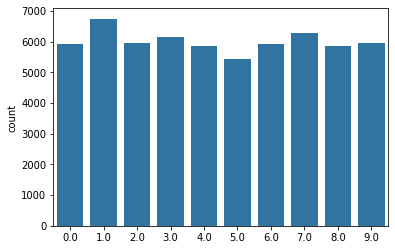

In [18]:
# laden der Daten + Trennen in Labels und vlaues
import seaborn as sns
images = numpy.loadtxt('/Users/jojo3/PycharmProjects/pythonstuff/data/mnist_train.csv',  delimiter=',')

print(images.shape)

labels = images[:,0]
values = images[:,1:]
#plotten der labels
sns.countplot(labels, color = sns.color_palette()[0]);

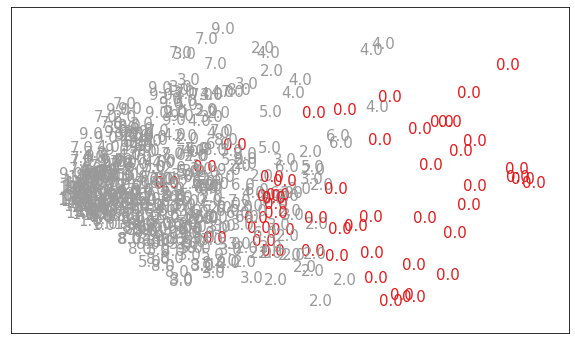